# Week 7 Assignment

## Description


This week you will begin a final project in this course broken up over different assignments in the last three weeks. Choose a machine learning appropriate dataset and import it into Python using Pandas or NumPy. If you are using a classification dataset, your target must be one-hot encoded. You will need to import the dataset so it is compatible with Scikit-learn/Keras, and it may not be one we have used previously in class. Finish this assignment by splitting the dataset into training and testing sets.

## Introduction


Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research, but in order to do that, there is a critical condition to be sorted out, findinfinding the right dataset to test and build predictive models.

That is a key aspect and a common problem in Machine Learning. Fortunately, the <a href="https://keras.io/datasets/">Keras.Datasets</a> module already includes methods to load and fetch popular reference datasets. Here's the list of available datasets:

<ul>
  <li><b>boston_housing module:</b> Boston housing price regression dataset.</li>
  <li><b>cifar10 module:</b> CIFAR10 small images classification dataset (classification of 10 image labels).</li>
  <li><b>cifar100 module:</b> CIFAR100 small images classification dataset (classification of 100 image labels).</li>
  <li><b>fashion_mnist module:</b> Fashion-MNIST dataset (classification of 10 digits).</li>
  <li><b>imdb module:</b> IMDB sentiment classification dataset (classification of 10 fashion categories).</li>
  <li><b>mnist module:</b> MNIST handwritten digits dataset (binary text classification).</li>
  <li><b>reuters module:</b> Reuters topic classification dataset(multiclass text classification).</li>
</ul>

## Implementation


For our purposes, and considering the considerations made on the assignment description, I have choose the CIRFAR10 as Dataset for the upcomming project.

<b><ins>CIFAR10:</ins></b> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset information and details can be found <a href="https://www.cs.toronto.edu/~kriz/cifar.html">here</a>.

he CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.The tech report <a href="https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf">Learning Multiple Layers of Features from Tiny Images, 2009</a> on its Chapter 3, describes the dataset and the methodology followed when collecting it in much greater detail.

Considering that the scope of the present assignment is to load the dataset validating its format and split it into training and testing groups


## Week 6 - Step by Step

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. Even that is not going to be used at this time, it is convenient to consider it since is going to be a vital part of our project.

Also, as described above, we will be using the build-in dataset CIFAR10.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from termcolor import colored

# Showing the shape of the training and testing datasets
def show_shapes(x_train, y_train, x_test, y_test, color='blue'):
    print(colored('Training:', color, attrs=['bold']))
    print('  x_train.shape:', x_train.shape)
    print('  y_train.shape:', y_train.shape)
    print(colored('\nTesting:', color, attrs=['bold']))
    print('  x_test.shape:', x_test.shape)
    print('  y_test.shape:', y_test.shape)
    
def plot_data(my_data, cmap=None):
    plt.axis('off')
    fig = plt.imshow(my_data, cmap=cmap)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    print(fig)

# Showing the x,y array for a sample image    
def show_sample(x_train, y_train, idx=0, color='blue'):
    print(colored('x_train sample:', color, attrs=['bold']))
    print(x_train[idx])
    print(colored('\ny_train sample:', color, attrs=['bold']))
    print(y_train[idx])

    # Showing the image from the x,y array sample previously given    
def show_sample_image(x_train, y_train, idx=0, color='blue', cmap=None):
    print(colored('Label:', color, attrs=['bold']), y_train[idx])
    print(colored('Shape:', color, attrs=['bold']), x_train[idx].shape)
    print()
    plot_data(x_train[idx], cmap=cmap)

# Declare variables
num_classes = 10
class_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','trunk']

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


Now, we are going to load CIFAR10 dataset into our model, obtaining two tuples of Numpy arrays: 

<b><i> (x_train, y_train), (x_test, y_test). </i></b>


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

show_shapes(x_train, y_train, x_test, y_test)

170508288/170498071 [==============================] - 14s 0us/step
Training:
('  x_train.shape:', (50000, 32, 32, 3))
('  y_train.shape:', (50000, 1))

Testing:
('  x_test.shape:', (10000, 32, 32, 3))
('  y_test.shape:', (10000, 1))


x_train sample:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

y_train sample:
[6]

------------------------------


Image index 0

('\x1b\x1bLabel:\x1b', array([6], dtype=uint8))
('\x1b\x1bShape:\x1b', (32, 32, 3))
()
AxesImage(54,36;334.8x217.44)


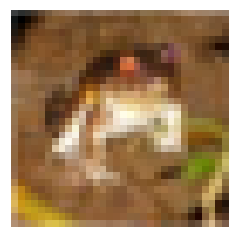

In [4]:
show_sample(x_train, y_train)
print '\n' + 30*'-' + '\n'
print '\nImage index 0\n'
show_sample_image(x_train, y_train)

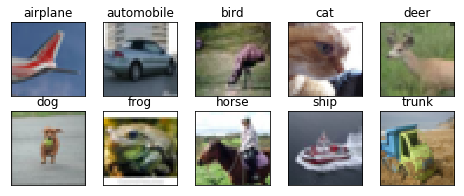

In [5]:
# Print figure with 10 random images from cifar dataset
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_label[i])
    plt.imshow(im)
plt.show()

## Week 6 Conclusion
We understand that loading the CIFAR10 dataset we obtain:

<ul>
  <li><b><i>x_train and x_test</b></i>
    <ul>
      <li>uint8 array of RGB image data with shape (num_samples, 32, 32, 3).</li>
    </ul>
  </li>
  <li><b><i>y_train and y_test</b></i>
    <ul>
      <li>uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).</li>
    </ul>
  </li>
</ul>

We can see also that the pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

## Week 7 - Step by Step
Now, we need to convert the label class (Y axis) to ensure the proper manipulation of the data by the model. This can be achieved by converting a class vector (integers) to binary class matrix with the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical">to_categorical</a> method defined on keras.

Besides that, it’s good practice to work with normalized data.

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.


In [6]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

Now, let’s start by defining a simple CNN model. We will use a model with one convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

We will be using Droupout as regularization technique, implementing it in at two points on our model, the first one right before flattening our data out with 25% and the second one right before the output layer with 50%.

As activation function, we are considering ReLU on every layer, except for the output one, using softmax for multi-dimentional evaluation. 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.1.
We are using "categorical_crossentropy" for loss with metric "accuracy"

In [8]:
# initiate SGD optimizer
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

So we have the following model created.

In [9]:
# Summary of neural network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

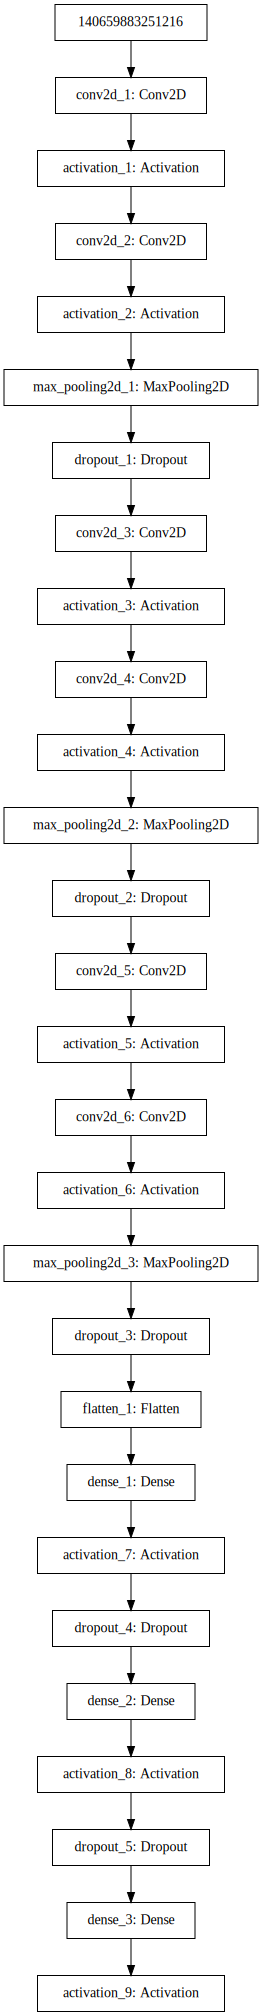

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Then we can fit this model with 100 epochs and a batch size of 32. We choose the batch size of 32 examples as a mini-batch, smaller batch size means more updates in one epoch.

In [11]:
batch_size = 64
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
epochs = 150 # repeat 100 times

We are going using an utility embeded in Keras for Image Processing called <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> which generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) for data augmentation.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,)
datagen.fit(x_train)

In [13]:
!pip install livelossplot

  Running setup.py bdist_wheel for livelossplot ... done
  Stored in directory: /root/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot
You are using pip version 8.1.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now, lets fit the model on the batches generated by datagen.flow(). Training the Model with Data Augmentation

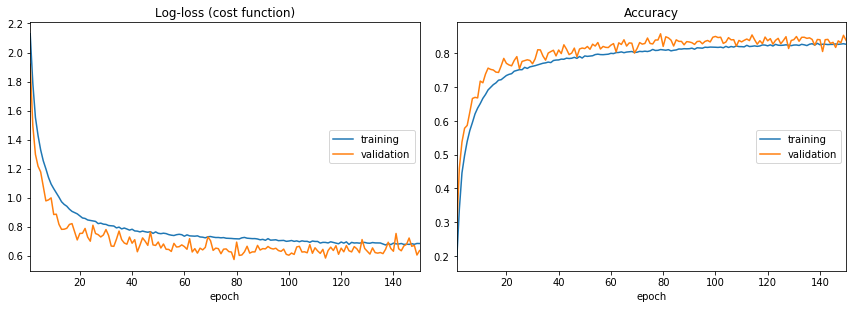

In [14]:
import livelossplot
import time
plot_losses = livelossplot.PlotLossesKeras()

start = time.time()
model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        callbacks=[plot_losses])

end = time.time()

In [17]:
# Loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print "Model took %0.2f seconds to train"%(end - start)
print "Test loss:", score[0]
print "Test accuracy:", score[1]*100, "%"
print "epoch:", epochs
print "batch size:", batch_size

Model took 4865.04 seconds to train
Test loss: 0.6347397992134094
Test accuracy: 83.81 %
epoch: 150
batch size: 64


(0, 1000)
(1, 1000)
(2, 1000)
(3, 1000)
(4, 1000)
(5, 1000)
(6, 1000)
(7, 1000)
(8, 1000)
(9, 1000)
[[850  30  22   6   5   3   6   9  38  31]
 [  3 963   1   0   0   1   2   0   1  29]
 [ 49   4 749  20  28  37  68  30   5  10]
 [ 21  12  36 608  32 125  96  27  21  22]
 [ 11   4  27  17 790  11  75  55   4   6]
 [  2   6  18  77  21 775  39  50   3   9]
 [  6   4  10  18   3   3 939   2  11   4]
 [  6   1   8  14  16  19  10 917   2   7]
 [ 30  36   3   4   0   3   4   3 882  35]
 [ 13  64   3   2   0   0   1   2   7 908]]


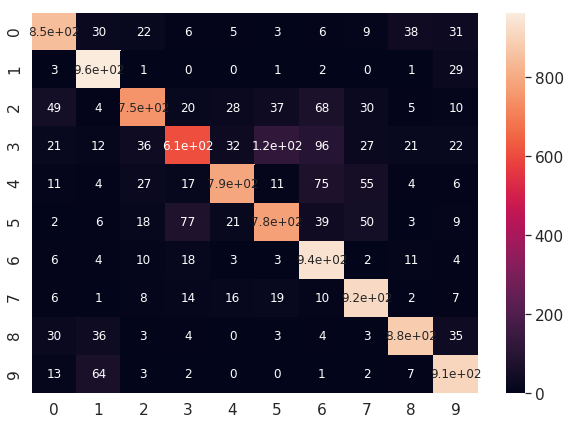

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()